In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# this jupyter notebook will use the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("./data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,0.072748,-0.012333,-0.059048,0.287118,0.337558,-0.337558,-0.043942,0.031922,-0.031922,0.054410,0.061662,-0.051273,-0.003013,-0.000566,0.017538,-0.002140,-0.079241,0.035902,0.105008,0.129444,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,0.042021,0.130379,0.054633,0.014224,-0.181716,0.181716,0.423883,0.003900,-0.003900,-0.000752,0.004241,0.003393,0.191842,0.031315,0.030962,-0.023719,0.439764,-0.184721,0.104600,0.222332,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,0.007501,0.097642,0.002609,-0.048398,-0.004961,0.004961,-0.132939,-0.011108,0.011108,-0.013284,-0.015563,0.012901,0.259045,0.018086,0.016958,-0.011543,-0.134479,-0.122911,0.016750,0.159761,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,-0.004913,0.030568,0.011326,0.023232,0.025359,-0.025359,-0.088001,-0.003062,0.003062,-0.011078,-0.013318,0.009913,0.218624,0.034874,0.045647,-0.028259,-0.091905,-0.103976,0.012411,0.120078,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,0.067571,0.012136,-0.074607,0.324488,0.373670,-0.373670,-0.064272,0.038614,-0.038614,0.072790,0.052353,-0.070736,-0.390006,-0.021743,-0.029905,0.020268,-0.081456,-0.022590,0.021806,0.036838,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,0.028068,-0.004699,-0.039732,0.268469,0.529821,-0.529821,-0.069138,0.009823,-0.009823,0.030522,0.021726,-0.030554,-0.229438,-0.011772,-0.016157,0.010945,-0.082299,0.021398,0.032776,0.078357,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,-0.028068,0.004699,0.039732,-0.268469,-0.529821,0.529821,0.069138,-0.009823,0.009823,-0.030522,-0.021726,0.030554,0.229438,0.011772,0.016157,-0.010945,0.082299,-0.021398,-0.032776,-0.078357,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,0.055597,0.044399,-0.065649,0.200979,0.228485,-0.228485,-0.037195,0.055597,-0.055597,0.039814,0.041496,-0.037977,-0.315510,-0.021307,-0.028232,0.020156,-0.058522,-0.006344,0.003641,0.039981,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,0.023150,-0.015680,-0.035277,0.199305,0.519143,-0.519143,-0.110431,0.015094,-0.015094,0.014575,0.031086,-0.013119,-0.106671,-0.003327,-0.005414,0.000172,-0.132032,0.069041,0.049934,0.063753,-0.056111,-0.046285,0.03

# Select your features (columns)

In [4]:
# Set features (removing features that are anticorrelated such as 'koi_period_err1' & 'koi_period_err2')
X1 = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_period_err1','koi_time0bk','koi_time0bk_err1','koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_depth','koi_depth_err1','koi_prad','koi_prad_err1','koi_prad_err2','koi_teq','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag']]
feature1_name = ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_period_err1','koi_time0bk','koi_time0bk_err1','koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_depth','koi_depth_err1','koi_prad','koi_prad_err1','koi_prad_err2','koi_teq','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag']

# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
# convert categorical outcome variable
label_encoder = LabelEncoder()
label_encoder.fit(df['koi_disposition'])
y=label_encoder.transform(df['koi_disposition'])
print(y)

[1 2 2 ... 0 2 2]


In [6]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=1)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale the data
X1_scaler = MinMaxScaler().fit(X1_train)
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)

<BarContainer object of 36 artists>

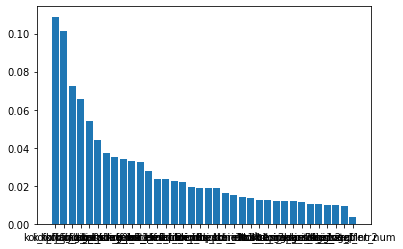

In [8]:
# Create a random forest classifier
rf1 = RandomForestClassifier(n_estimators=200)
rf1 = rf1.fit(X1_train_scaled, y_train)
importances1 = rf1.feature_importances_

# sort the features by their importance and plot them
sorted_X1=sorted(zip(importances1, feature1_name), reverse=True)
X1_importance = [x[0] for x in sorted_X1]
X1_feature = [x[1] for x in sorted_X1]

plt.bar(X1_feature,X1_importance)

In [9]:
# Extract subset of features based on importance
X2=df[X1_feature[0:11]]
feature2_name=X1_feature[0:11]
print(f'X2 features: {feature2_name}')

X2 features: ['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad', 'koi_duration_err1', 'koi_fpflag_ec', 'koi_steff_err1', 'koi_time0bk_err1', 'koi_prad_err2', 'koi_prad_err1']


# Train the Model

<BarContainer object of 11 artists>

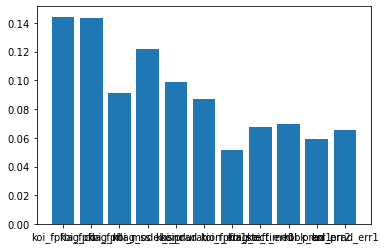

In [10]:
# generate new train-test split based on new subset of feature
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=1)

# Scale the data
X2_scaler = MinMaxScaler().fit(X2_train)
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

# Create a random forest classifier
rf2 = RandomForestClassifier(n_estimators=200)
rf2 = rf2.fit(X2_train_scaled, y_train)
importances2 = rf2.feature_importances_

# We can sort the features by their importance
plt.bar(feature2_name,importances2)

In [11]:
print(f"Model 1 Training Data Score: {rf1.score(X1_train_scaled, y_train)}")
print(f"Model 1 Testing Data Score: {rf1.score(X1_test_scaled, y_test)}")
print(f"Model 2 Training Data Score: {rf2.score(X2_train_scaled, y_train)}")
print(f"Model 2 Testing Data Score: {rf2.score(X2_test_scaled, y_test)}")

Model 1 Training Data Score: 1.0
Model 1 Testing Data Score: 0.9136155606407322
Model 2 Training Data Score: 1.0
Model 2 Testing Data Score: 0.9044622425629291


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [12]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200,300,400,500,600,700,800,900,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,1,2,3,4,5,6,7,8,9,10],
    'criterion' :['gini','entropy'],
    'bootstrap' :[True, False]
}
grid = GridSearchCV(rf2,param_grid,verbose=2)

In [13]:
# Train the model with GridSearch
grid.fit(X2_train, y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200, total=   1.8s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=300, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=1000, total=   7.3s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=auto, n_estimators=1000, total=   7.3s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.4s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.4s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.5s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000, total=   7.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000, total=   7.2s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000, total=   7.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000, total=   7.2s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=1000, total=   7.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=200 
[CV]  bootstrap=

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=900, total=   6.4s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=900, total=   6.6s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=900, total=   6.4s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=1000, total=   7.0s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=1000, total=   7.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=900, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=1000, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=1, m

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=900, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max

[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=800, total=   1.9s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=1, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=1, max_

[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=800, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_

[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=800, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=800, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=900, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=900, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_

[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=900, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=2, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=2, max_

[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_

[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=700, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_

[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=700, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=700, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_

[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=700, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=800, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=800, total=   3.1s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_

[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=800, total=   3.1s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_

[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=700, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=4, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=gini, max_depth=4, max_

[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=600, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_

[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=600, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=600, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_

[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=600, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=600, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=600, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=700, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=700, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=5, max_

[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=600, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=700, total=   3.2s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_

[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=600, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_

[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=500, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=6, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=6, max_

[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=500, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=500, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600, total=   3.2s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600, total=   3.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600, total=   3.6s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_

[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   3.1s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=600, total=   3.4s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=600, total=   3.3s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_

[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=500, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=600, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=7, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=7, max_

[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500, total=   3.0s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=500, total=   2.8s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_

[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_

[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=400, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=400, total=   2.1s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   2.6s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=8, max_

[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=400, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=400, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=400, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=500, total=   2.7s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_

[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.5s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.4s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_

[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.2s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=9, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=gini, max_depth=9, max_

[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400, total=   2.3s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   1.7s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   1.8s
[CV] bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=gini, max_dep

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300, total=   2.5s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300, total=   2.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300, total=   2.5s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, n_estimators=1000, total=   8.9s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.8s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=   8.3s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=   8.4s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=   8.4s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=   8.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=   9.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_es

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=   7.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=   7.7s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=   7.5s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=   7.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimators=1000, total=   8.4s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=log2, n_estimator

[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800, total=   2.2s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   2.1s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.7s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.8s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.8s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800, total=   2.1s
[CV] bootstrap=True, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=600, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.5s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.3s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=700, total=   2.2s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500, total=   1.6s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500, total=   1.6s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.5s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.5s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.6s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=300, total=   1.2s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.5s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.5s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.5s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.6s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.4s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=400, total=   1.8s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300, total=   1.4s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   4.6s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   1.0s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   1.0s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  bootstrap=True

[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=900, total=   4.6s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   5.0s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   5.0s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   5.0s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   4.8s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=

[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.4s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.5s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.4s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000, total=   4.8s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, 

[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800, total=   3.9s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800, total=   3.9s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900, total=   4.4s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900, total=   4.4s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   4.2s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   4.2s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   4.2s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.3s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=600, total=   3.3s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   3.8s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   3.8s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   3.7s
[CV] bootstrap=True, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   3.5s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   3.4s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   3.4s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   3.5s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=700, total=   4.1s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=auto, n_estimators=700 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, total=   3.1s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600, total=   3.5s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600, total=   3.6s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600, total=   3.5s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   3.0s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   2.9s
[CV] bootstrap=True, criterion=entropy, max_depth=7, max_features=log2, n_estimators=600 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   2.5s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   2.6s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500, total=   3.1s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500, total=   3.1s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300, total=   1.8s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   2.5s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   2.5s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   2.6s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   1.8s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=400, total=   2.4s
[CV] bootstrap=True, criterion=entropy, max_depth=8, max_features=log2, n_estimators=400 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300, total=   1.9s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300, total=   2.0s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.4s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.4s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=True, cri

[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   6.4s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   6.5s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   6.5s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200, total=   1.3s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200 
[CV]  bootstrap=True

[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=900, total=   6.0s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   6.5s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   6.6s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   6.5s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   6.6s
[CV] bootstrap=True, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=

[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   6.3s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   6.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   6.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   6.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=1000, total=   6.9s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=1000 
[CV]  bootst

[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800, total=   5.4s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800, total=   5.5s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900, total=   6.2s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900, total=   6.2s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900, total=   6.1s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV]  bootstrap

[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   5.6s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   6.0s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   5.6s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   5.6s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   5.5s
[CV] bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=900 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=700, total=   6.8s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=700, total=   7.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=700, total=   7.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=800, total=   7.9s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=800, total=   8.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=auto, n_estimators=800 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=600, total=   6.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700, total=   7.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700, total=   7.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700, total=   7.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700, total=   7.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=700 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600, total=   6.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600, total=   6.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600, total=   6.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=600, total=   6.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=700, total=   7.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=700 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=600, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=600, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=500, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=1, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=500, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=300, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400, total=   1.2s
[CV] bootstrap=False, criterion=gini, max_depth=2, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=400, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=400, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=200, total=   0.7s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=200, total=   0.7s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=300, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=1000, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_d

[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, total=   4.4s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=1000, total=   4.4s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=200, total=   0.9s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, m

[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, total=   4.4s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=4, max_features=log2, n_estimators=1000, total=   4.4s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=gin

[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=900, total=   4.6s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=900, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000, total=   5.0s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini,

[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.4s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=900, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=gini, max

[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=800, total=   4.0s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900, total=   4.6s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900, total=   4.6s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=800, total=   5.0s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=800, total=   5.1s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=800, total=   5.0s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=900, total=   5.8s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=900, total=   5.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.7s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.6s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=800, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=700, total=   3.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=700, total=   3.9s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800, total=   4.5s
[CV] bootstrap=False, criterion=gini, max_depth=6, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700, total=   4.2s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=800, total=   4.9s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=600, total=   3.7s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700, total=   4.2s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=600, total=   3.8s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=600, total=   3.7s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=600, total=   3.8s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=700, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=7, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600, total=   3.9s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600, total=   3.9s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   3.3s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   3.4s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600, total=   4.3s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600, total=   4.1s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   3.3s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   3.3s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   3.3s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=500, total=   3.4s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=gini, max_depth=8, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=400, total=   2.9s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500, total=   3.5s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.8s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.9s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=400, total=   2.9s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500, total=   3.5s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500, total=   3.5s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   3.1s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.9s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=400, total=   2.9s
[CV] bootstrap=False, criterion=gini, max_depth=9, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=gini, max_de

[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=300, total=   2.2s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=gi

[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   2.2s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=gi

[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=200, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   2.2s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=gini, max_depth=10, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=gi

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=200, total=   2.5s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=300, total=   3.7s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_e

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=1000, total=  12.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=1000, total=  12.5s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   2.5s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=200, total=   2.5s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, 

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=900, total=  10.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=  12.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=  12.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=  12.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=1000, total=  12.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=s

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=  10.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=  11.4s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=  11.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=  10.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_estimators=900, total=  10.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=log2, n_e

[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800, total=   1.8s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=800, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=auto, n_estimators=900 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=700, total=   1.6s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   1.8s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   1.8s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=sqrt, n_estimators=800 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=700, total=   1.8s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=1, max_features=log2, n_estimators=800 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=600, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=600, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.3s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700, total=   2.3s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=auto, n_estimators=700 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   2.0s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=600, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=700 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500, total=   1.9s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500, total=   1.8s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=500, total=   1.8s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=2, max_features=log2, n_estimators=600 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500, total=   2.2s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=auto, n_estimators=500 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500, total=   2.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=500 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=300, total=   1.3s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=300, total=   1.3s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400, total=   1.6s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=log2, n_estimators=400 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=400 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300, total=   1.5s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=300 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  bootstra

[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   5.1s
[CV] bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=4, max_features=log2, n_estimators=1000, total=   5.5s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   1.2s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  bo

[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=900, total=   5.4s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=900, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   6.0s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   5.9s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000, total=   5.8s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, n_estimators=1000 
[CV]  bo

[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   5.2s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   5.4s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=900, total=   5.4s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=1000 
[CV]  bootstra

[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800, total=   4.6s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800, total=   4.7s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=800, total=   4.7s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900, total=   5.2s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=5, max_features=log2, n_estimators=900 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=700, total=   4.7s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   5.4s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=auto, n_estimators=800 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   4.7s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   4.6s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   4.6s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=700, total=   4.7s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800, total=   5.3s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=800 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=600, total=   4.0s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   4.6s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   4.7s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700, total=   4.6s
[CV] bootstrap=False, criterion=entropy, max_depth=6, max_features=log2, n_estimators=700 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   4.5s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   4.5s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   4.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   4.4s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=600, total=   4.4s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=auto, n_estimators=700 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600, total=   4.3s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600, total=   4.5s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=600 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=400, total=   3.0s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   3.7s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500, total=   3.6s
[CV] bootstrap=False, criterion=entropy, max_depth=7, max_features=log2, n_estimators=500 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   3.2s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   3.1s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   3.1s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=400, total=   3.2s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500, total=   3.9s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=auto, n_estimators=500 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300, total=   2.3s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=300, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   3.2s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   3.2s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, total=   3.1s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=300, total=   2.4s
[CV] bootstrap=False, criterion=entropy, max_depth=8, max_features=log2, n_estimators=400 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300, total=   2.5s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300, total=   2.6s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=300 
[CV]  bootstrap

[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=1000, total=   8.4s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=200 
[CV]  bootstra

[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   8.5s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   8.5s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   8.2s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=1000, total=   8.4s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200, total=   1.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=200 
[CV]  bo

[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=900, total=   7.6s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=900, total=   7.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   8.4s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   8.7s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000, total=   8.5s
[CV] bootstrap=False, criterion=entropy, max_depth=9, max_features=log2, n_estimators=1000 
[CV]  bo

[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   8.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   8.6s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   8.3s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   8.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=900, total=   8.2s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, n_estimators=1000 
[CV]

[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800, total=   7.2s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800, total=   7.0s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=800, total=   7.1s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900, total=   8.1s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900, total=   8.7s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=900 
[CV] 

[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=700, total=   6.4s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   7.1s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   7.2s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   7.1s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV]  bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800, total=   7.3s
[CV] bootstrap=False, criterion=entropy, max_depth=10, max_features=log2, n_estimators=800 
[CV] 

[Parallel(n_jobs=1)]: Done 5940 out of 5940 | elapsed: 330.2min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000]},
             verbose=2)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 900}
0.8893741040176394


In [15]:
# set up and run the final model
rf_final=RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=7, max_features='auto', n_estimators= 900,random_state=1 )

In [17]:
rf_final = rf_final.fit(X2_train_scaled, y_train)

In [19]:
print(f"Final model Training Data Score: {rf_final.score(X2_train_scaled, y_train)}")
print(f"Final model Testing Data Score: {rf_final.score(X2_test_scaled, y_test)}")

Final model Training Data Score: 0.8954796872019836
Final model Testing Data Score: 0.902745995423341


# Save the Model

In [20]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'rfmodel01.sav'
joblib.dump(rf_final, filename)

['rfmodel01.sav']